H4.3 K-means clustering
=======================

### (a) K-means algorithm for color image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [9]:
def argmin(x, means):
    # Squared euclidean distance
    l, min_d = -1, 195076
    for k in range(len(means)):
        d = np.sum((x - means[k]) ** 2)
        if min_d > d:
            min_d = d
            l = k
    return l
    

In [10]:
def k_means(image, K):
    # Initialize
    m, n = image.shape[:2]
    means = np.random.randint(np.amax(image), size=(K, 3))
    labels = np.zeros((m, n))

    for _ in range(20):
        # Update labels
        for i in range(m):
            for j in range(n):
                labels[i, j] = argmin(image[i, j], means)

        # Update centers
        x_sum_by_label = np.zeros((K, 3))
        sum_by_label = np.zeros(K)
        for i in range(m):
            for j in range(n):
                x_sum_by_label[int(labels[i, j]), :] += image[i, j]
                sum_by_label[int(labels[i, j])] += 1
        for k in range(K):
            means[k] = x_sum_by_label[k, :] / sum_by_label[k]

    # Show segmented image
    seg = np.zeros(image.shape)
    for i in range(m):
        for j in range(n):
            seg[i, j, :] = means[int(labels[i, j]), :] / 255.0
    plt.imshow(seg)

### (b) Segmentation of my selfie

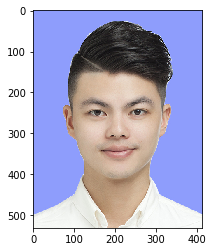

In [4]:
image = np.array(Image.open('selfie.png'))
plt.imshow(image)

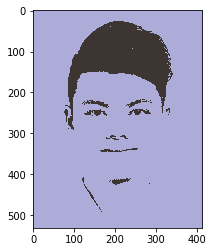

In [5]:
k_means(image, 2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


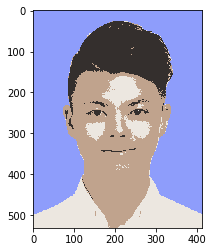

In [6]:
k_means(image, 4)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


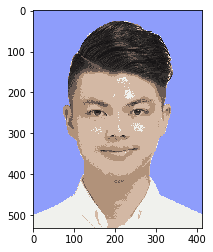

In [7]:
k_means(image, 8)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


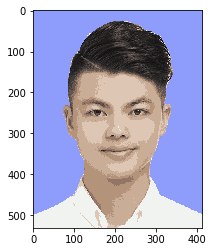

In [8]:
k_means(image, 16)

### (c) K-means with absolute distance

In [11]:
def argmin(x, means):
    # Absolute distance
    l, min_d = -1, 766
    for k in range(len(means)):
        d = np.sum(np.absolute(x - means[k]))
        if min_d > d:
            min_d = d
            l = k
    return l

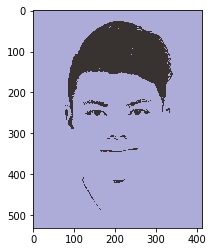

In [12]:
k_means(image, 2)

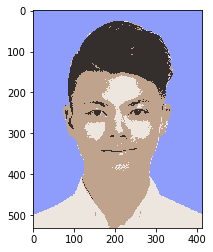

In [13]:
k_means(image, 4)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


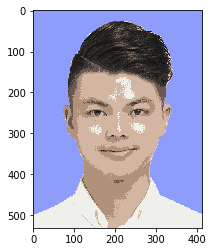

In [14]:
k_means(image, 8)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


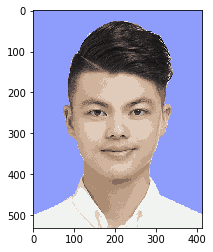

In [15]:
k_means(image, 16)